In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
#from sklearn.metrics import r2_score


In [2]:
PINT = pd.read_csv('PINTv811.csv')
PINT

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QSTAT,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI
0,1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
4,5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0
4644,4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4645,4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0
4646,4658,NaN,783,CR14,10.550,-85.707,135.10,0.75,Ar/Ar,North America,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0


In [3]:
GPTS = pd.read_csv('GPTS.csv')
GPTS

,start of normal chron,end of normal chron
0,0.000,0.780
1,0.990,1.070
2,1.770,1.950
3,2.140,2.150
4,2.581,3.040
...,...,...
88,71.071,71.338
89,71.587,73.004
90,73.291,73.374
91,73.619,79.075


In [4]:
GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

In [5]:
def combine_VDM(row):
    if pd.isna(row['VDM']) == False :
        return row['VDM']
    elif pd.isna(row['VADM']) == False :
        return row['VADM']
    else:
        return row['VDM/VADM']
PINT['allVDM'] = PINT.apply(lambda row: combine_VDM(row), axis=1)


In [6]:
def calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=True):
    
    GPTSselected = GPTS[(GPTS['end of normal chron']>=lowerAgeLimit) & (GPTS['start of normal chron']<=upperAgeLimit)]
    reversalList = GPTSselected['start of normal chron'].tolist() + GPTSselected['end of normal chron'].tolist()
    
    for item in reversalList.copy():
        if item < lowerAgeLimit or item > upperAgeLimit:
            reversalList.remove(item)
    
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))
    #print(gptsList)
    if plot==True:
        fig, ax = plt.subplots(figsize=(18, 5))
        ax.broken_barh(gptsList, (0,1), facecolors='black')
        ax.get_yaxis().set_visible(False)
        ax.set_xlabel('Age (ma)')
    
    reversalFreq = (len(reversalList)/(upperAgeLimit - lowerAgeLimit))
    print(f'({len(reversalList)}/({upperAgeLimit} - {lowerAgeLimit}))')
    print(reversalList)
    return reversalFreq

(12/(62 - 52))
[52.364, 52.757, 52.903, 55.904, 57.554, 60.92, 52.663, 52.801, 53.347, 56.391, 57.911, 61.276]


1.2

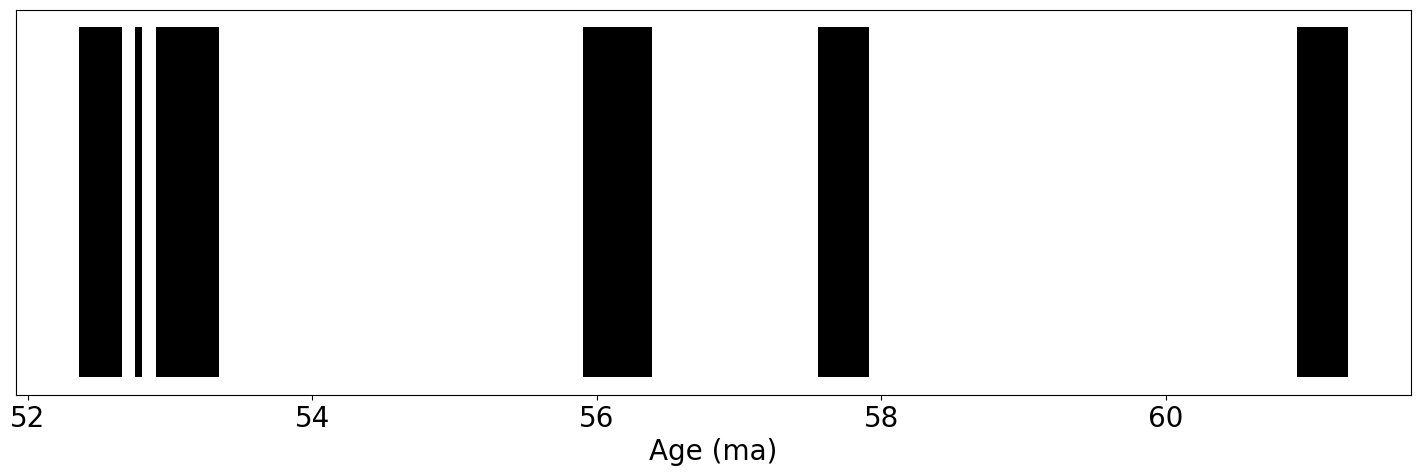

In [9]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
calc_rev_freq(52,62)

In [79]:
PINT

,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
0,1,1,1,Joshua Hotaka Yama,36.800,139.200,1.80,0.20,K-Ar,Asia,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.280702
1,2,2,2,Aragats,41.000,45.000,1.00,1.00,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.932283
2,3,3,2,Stepanavan,41.000,46.000,2.60,0.80,Stratigraphy,Europe,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.807257
3,4,5,4,Anahola 05,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.800000
4,5,6,4,Anahola 07,22.300,201.100,4.45,0.65,K-Ar,Pacific Ocean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4643,4655,NaN,783,CR03,10.571,-85.687,130.00,2.25,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,83.000000
4644,4656,NaN,783,CR05,10.589,-85.680,112.40,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,53.200000
4645,4657,NaN,783,CR06,10.588,-85.679,112.40,0.45,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,86.600000
4646,4658,NaN,783,CR14,10.550,-85.707,135.10,0.75,Ar/Ar,North America,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,88.400000


4553 N 
N
4554 N 
N
4555 R 
R
4556 R 
R
4558 R 
R
4560 R 
R
4564 R 
R


,UID,OLD_DATA,REF,IDENT,SLAT,SLONG,AGE,DAGE,AGEMTD,CONTINENT,...,QTRM,QALT,QMD,QACN,QTECH,QLITH,QMAG,QDIR,QPI,allVDM
2899,2911,NaN,605,Hampton park,-36.950000,174.890000,0.05500,0.0050,K-Ar,Pacific Ocean,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,2.107429
3185,3197,8526,639,mc13,-77.640000,166.410000,0.05500,0.0100,Ar/Ar,Antarctica,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,4.243983
4112,4124,NaN,717,T25-28,-35.083333,347.716667,0.05545,0.0137,Ar/Ar,Atlantic Ocean,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,4.020544
3186,3198,8528,639,mc28,-78.290000,164.730000,0.06000,0.0060,Ar/Ar,Antarctica,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.956964
3393,3405,8970,663,mc225,-77.581000,166.802000,0.06000,0.0100,Ar/Ar,Antarctica,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,6.0,4.070346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591,2592,6406,512,0334x171p01,37.000000,326.000000,9.80000,0.5000,GPTS,Atlantic Ocean,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,5.500000
2238,2239,2950,194,SJG16,26.500000,247.300000,9.90000,1.9000,Estimated,North America,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,6.795202
2237,2238,2949,194,SJG15,26.500000,247.300000,9.90000,1.9000,Estimated,North America,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,5.0,7.018672
3564,3576,9122,675,Shishlovskii Volcano,48.900000,136.000000,10.00000,3.0000,Estimated,Europe,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,5.0,3.151015


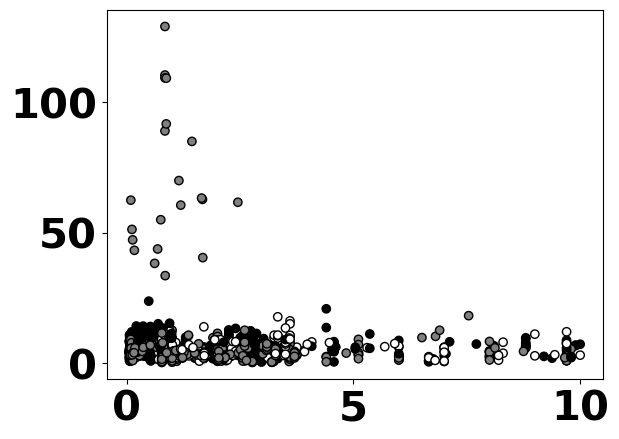

In [80]:
lowerAgeLimit = 0
upperAgeLimit = 10 #ma
QPIfilter = 3 #QPI score must be greater than or equal to filter



GPTS['chron length'] = GPTS.apply(
    lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)



PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

##Fix missing polarity values with filler
values = {"P": 'O'}
PINTselected = PINTselected.fillna(value=values)

for i in range(len(PINTselected)):
    pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
    if pol1 not in ['N' ,'R', 'T', 'O']:
        print (PINTselected.index[i], pol1)
        if pol1 =='N ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
        if pol1 =='R ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
        print(PINTselected.loc[PINTselected.index[i], 'P'])

colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

PINTselected[(PINTselected.allVDM>=20)]

#PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

mean = PINTselected["allVDM"].mean()
mean

std = PINTselected["allVDM"].std()
std

PINTselected = PINTselected.sort_values(by=['AGE'])
PINTselected

In [81]:
revFreqs = []
ages = []
for age in range(5,121):
    lowerAgeLimit = age - 5
    upperAgeLimit = age + 5
    reversalFreq = calc_rev_freq(lowerAgeLimit, upperAgeLimit, plot=False)
    dictRev = {age: reversalFreq}
    revFreqs.append(reversalFreq)
    ages.append(age)


(47/(10 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88]
(45/(11 - 1))
[1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949]
(47/(12 - 2))
[2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531]
(52/(13 - 3))
[3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.89

In [24]:
revFreqsdf = pd.DataFrame()
revFreqsdf['age'] = ages
revFreqsdf['reversal frequency'] = revFreqs
revFreqsdf.to_csv('reversalFreq.csv')
revFreqsdf

,age,reversal frequency
0,5,4.7
1,6,4.5
2,7,4.7
3,8,5.2
4,9,5.1
...,...,...
111,116,0.1
112,117,0.1
113,118,0.1
114,119,0.1


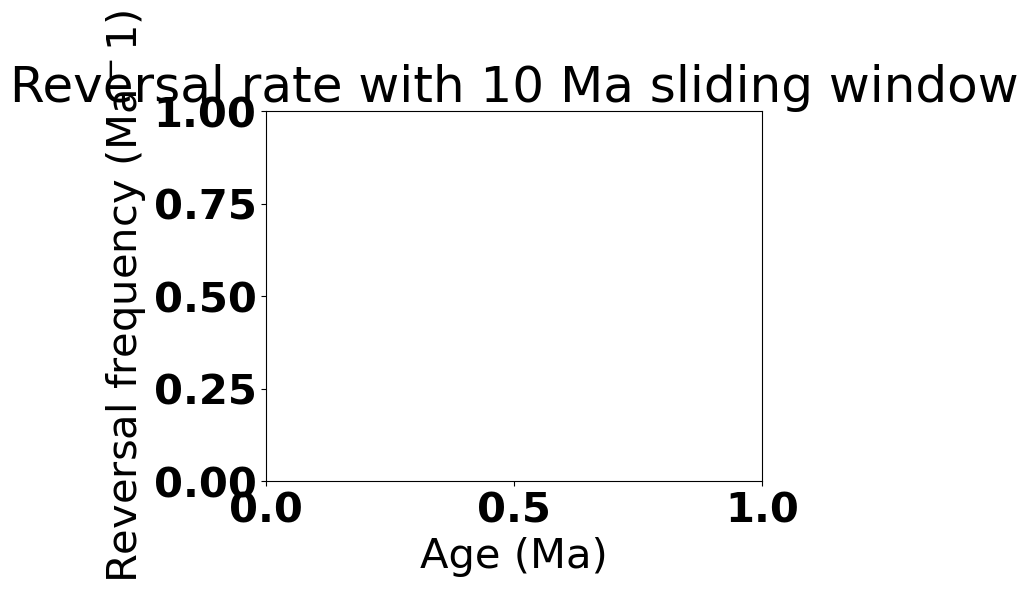

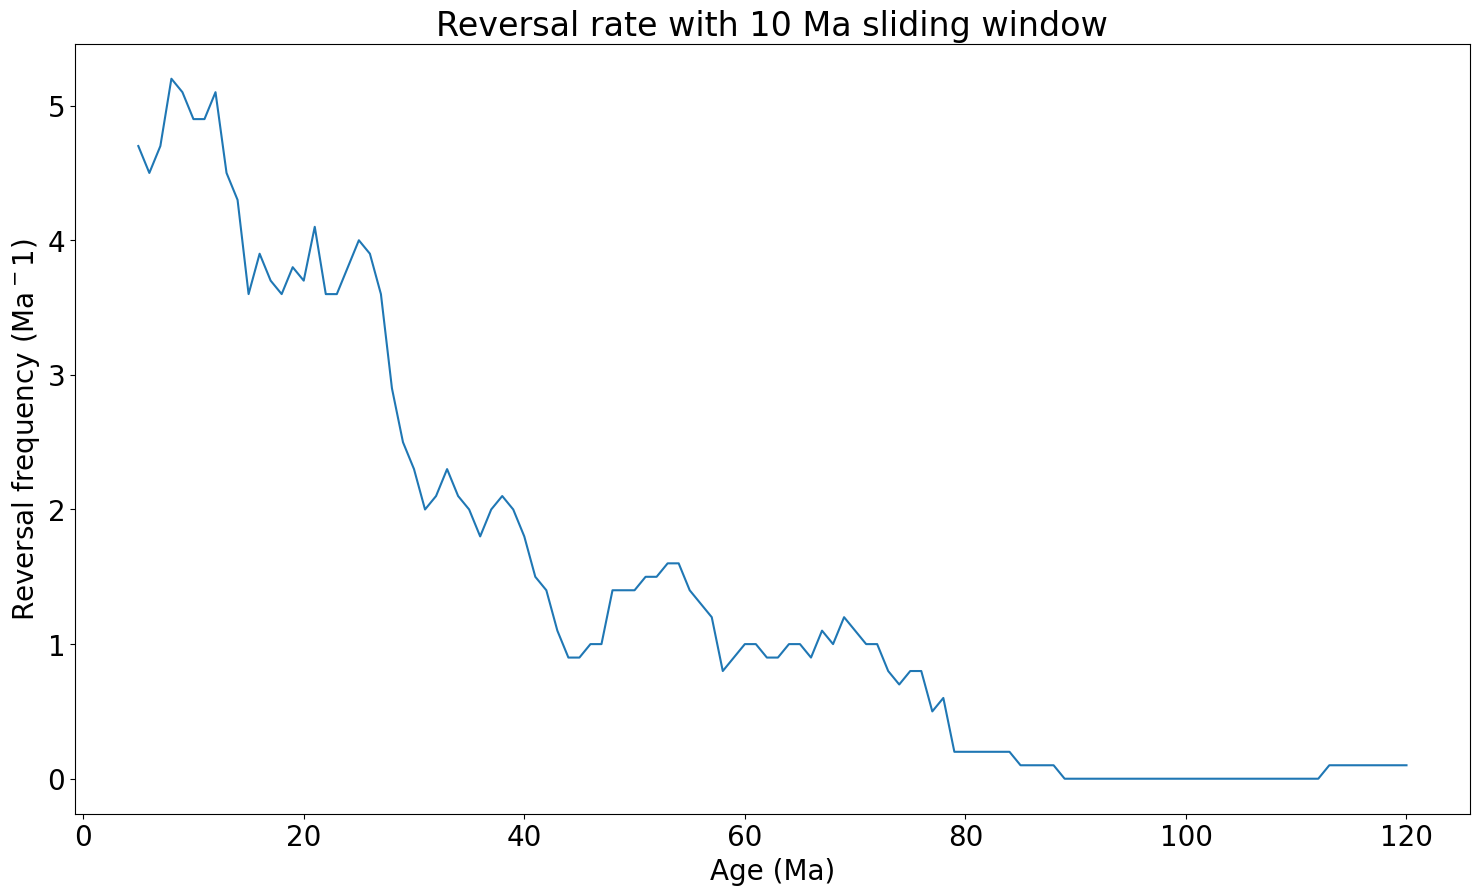

In [98]:
fig = plt.figure(figsize=(18, 10))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)
plt.plot(ages, revFreqs)
plt.title('Reversal rate with 10 Ma sliding window')
plt.xlabel('Age (Ma)')
plt.ylabel('Reversal frequency (Ma$^-1$)')
plt.show()

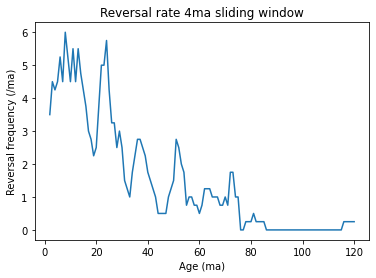

In [72]:
plt.plot(ages, revFreqs)
plt.title('Reversal rate 4ma sliding window')
plt.xlabel('Age (ma)')
plt.ylabel('Reversal frequency (/ma)')
plt.show()

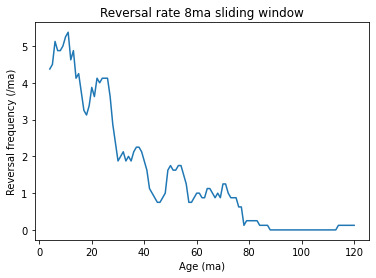

In [68]:
plt.plot(ages, revFreqs)
plt.title('Reversal rate 8ma sliding window')
plt.xlabel('Age (ma)')
plt.ylabel('Reversal frequency (/ma)')
plt.show()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


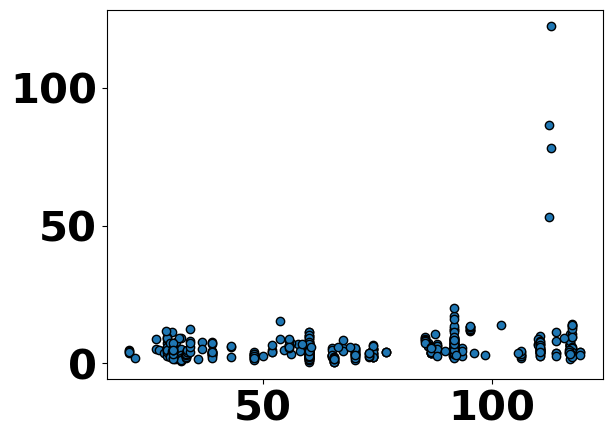

In [28]:
lowerAgeLimit = 20
upperAgeLimit = 120 #ma
QPIfilter = 3 #QPI score must be greater than or equal to filter


PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit) & (PINT['allVDM'].isna()==False)]

##Fix missing polarity values with filler
values = {"P": 'O'}
PINTselected = PINTselected.fillna(value=values)

for i in range(len(PINTselected)):
    pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
    if pol1 not in ['N' ,'R', 'T', 'O']:
        #print (PINTselected.index[i], pol1)
        if pol1 =='N ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
        if pol1 =='R ':
            PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
        #print(PINTselected.loc[PINTselected.index[i], 'P'])

colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], edgecolors= "black")


(20.0, 120.0)

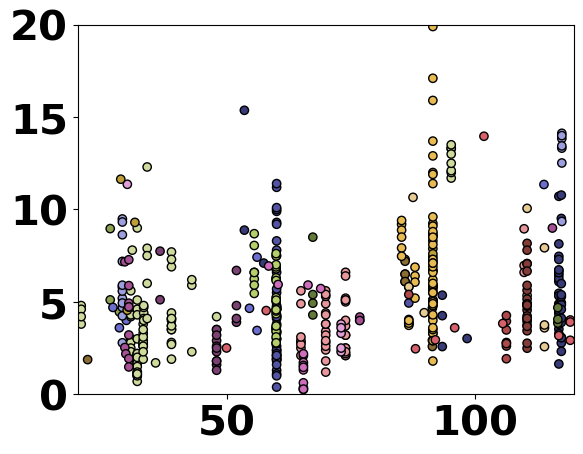

In [29]:
fig, ax = plt.subplots()
ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], 
           c = pd.Categorical(PINTselected.REF).codes, cmap='tab20b', edgecolors= "black")
plt.ylim(0, 20)
plt.xlim(20, 120)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


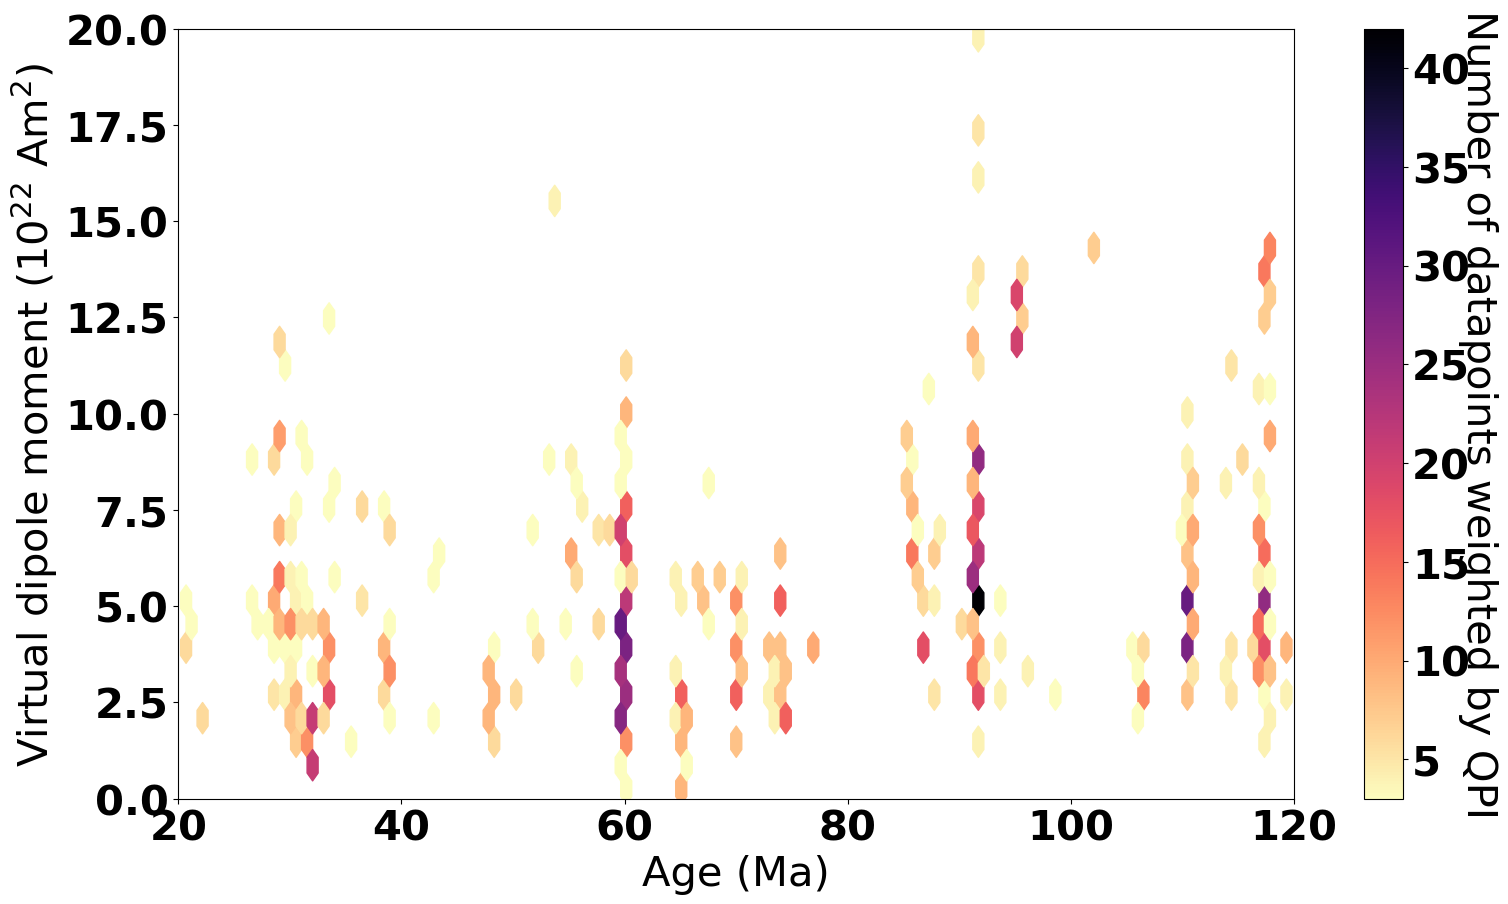

In [30]:
fig = plt.figure(figsize=(18, 10))
plt.hexbin(PINTselected['AGE'], PINTselected['allVDM'], C=PINTselected['QPI'], reduce_C_function=np.sum,
           gridsize=(100,100), cmap=plt.cm.magma_r)
cbar = plt.colorbar()
cbar.set_label('Number of datapoints weighted by QPI', rotation=270, labelpad=20)
plt.ylim(0, 20)
plt.xlim(20, 120)
#plt.plot(myline, mymodel(myline), color = 'black')
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^{22}$ Am$^2$)')
plt.show()

In [37]:
MCADAM = pd.read_excel('mcadam-bono-et-al\\MCADAM_Bono_et_al\\MCADAMv1b.xlsx', index_col='timestep')
MCADAM

,age,mean,std,mode,2.5%,25%,50%,75%,97.5%
timestep,,,,,,,,,
0,0.055,6.264778,0.423396,6.207087,5.470196,5.979318,6.252689,6.541811,7.131056
1,0.105,6.479454,0.300689,6.477200,5.900301,6.274407,6.475441,6.680122,7.092323
2,0.155,6.028607,0.447652,5.936136,5.199389,5.713928,6.012255,6.320216,6.948601
3,0.205,7.475569,0.560026,7.400328,6.427980,7.091302,7.458524,7.836350,8.625885
4,0.255,7.002658,0.585351,6.891321,5.937833,6.594186,6.974337,7.377973,8.219330
...,...,...,...,...,...,...,...,...,...
73114,3655.755,1.705374,1.217865,0.859850,0.454667,0.843326,1.284755,2.224143,4.904380
73115,3655.805,1.705243,1.217849,0.859783,0.454663,0.842935,1.284755,2.224143,4.903335
73116,3655.855,1.705113,1.217833,0.859715,0.454658,0.842947,1.284755,2.224143,4.903326


In [41]:
MCADAMselected = MCADAM[(MCADAM.age>=lowerAgeLimit) & (MCADAM.age<=upperAgeLimit)]


In [45]:
len(MCADAMselected['50%'])

2000

In [46]:
len(MCADAMselected['age'])

2000

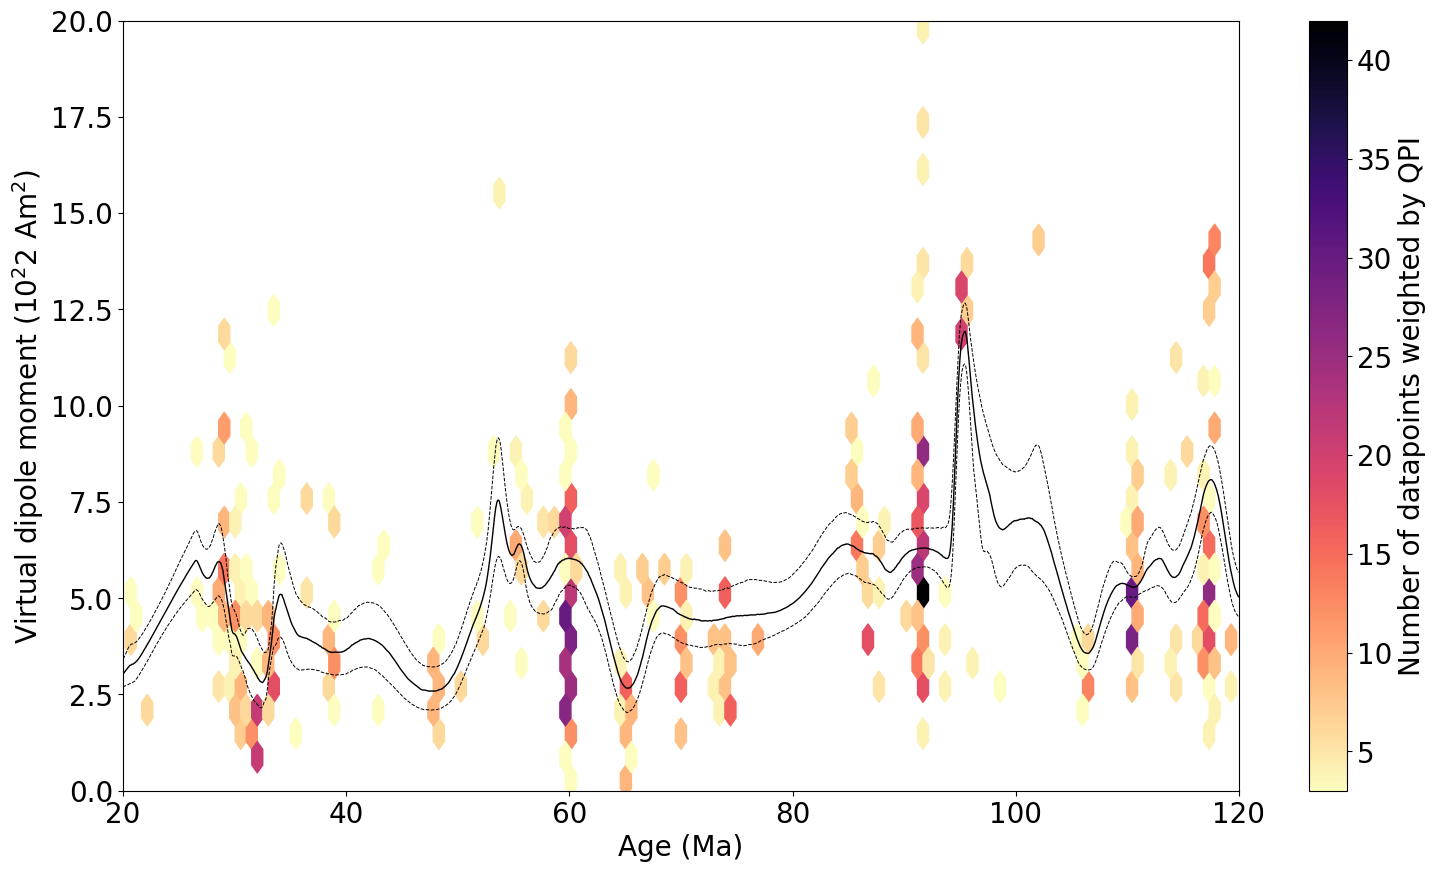

In [70]:
fig = plt.figure(figsize=(18, 10))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.hexbin(PINTselected['AGE'], PINTselected['allVDM'], C=PINTselected['QPI'], reduce_C_function=np.sum,
           gridsize=(100,100), cmap=plt.cm.magma_r)
plt.colorbar(label='Number of datapoints weighted by QPI')
plt.ylim(0, 20)
plt.xlim(20, 120)
plt.xlabel('Age (Ma)')
plt.ylabel('Virtual dipole moment ($10^22$ Am$^2$)')
plt.plot(MCADAMselected.age, MCADAMselected['50%'], 'k-', linewidth=1)
plt.plot(MCADAMselected.age, MCADAMselected['25%'], 'k--', linewidth=0.7)
plt.plot(MCADAMselected.age, MCADAMselected['75%'], 'k--', linewidth=0.7)
plt.show()

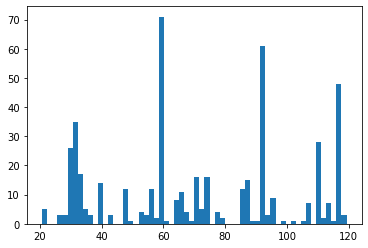

In [65]:
plt.hist(PINTselected['AGE'], bins = 60)
plt.show() 

(185/(100 - 0))
[0.0, 0.99, 1.77, 2.14, 2.581, 3.11, 3.33, 4.18, 4.48, 4.8, 4.98, 5.894, 6.269, 6.935, 7.135, 7.341, 7.432, 7.65, 8.225, 8.699, 9.23, 9.58, 9.74, 9.92, 11.052, 11.476, 11.935, 12.184, 12.678, 12.775, 12.991, 13.302, 13.703, 14.178, 14.8, 15.034, 16.014, 16.327, 16.556, 17.277, 18.281, 19.048, 20.518, 20.996, 21.768, 22.151, 22.459, 22.588, 22.804, 23.353, 23.677, 23.999, 24.73, 24.835, 25.496, 25.823, 25.992, 27.027, 28.283, 28.578, 29.401, 29.765, 30.479, 33.058, 34.655, 35.343, 35.685, 36.618, 37.604, 37.92, 38.426, 39.631, 41.257, 42.536, 46.264, 49.037, 50.778, 51.047, 52.364, 52.757, 52.903, 55.904, 57.554, 60.92, 62.499, 63.976, 65.578, 67.735, 71.071, 71.587, 73.291, 73.619, 83.0, 0.78, 1.07, 1.95, 2.15, 3.04, 3.22, 3.58, 4.29, 4.62, 4.89, 5.23, 6.137, 6.567, 7.091, 7.17, 7.375, 7.562, 8.072, 8.257, 9.025, 9.308, 9.642, 9.88, 10.949, 11.099, 11.531, 12.078, 12.401, 12.708, 12.819, 13.139, 13.51, 14.076, 14.612, 14.888, 15.155, 16.293, 16.488, 16.726, 17.615, 18.7

1.85

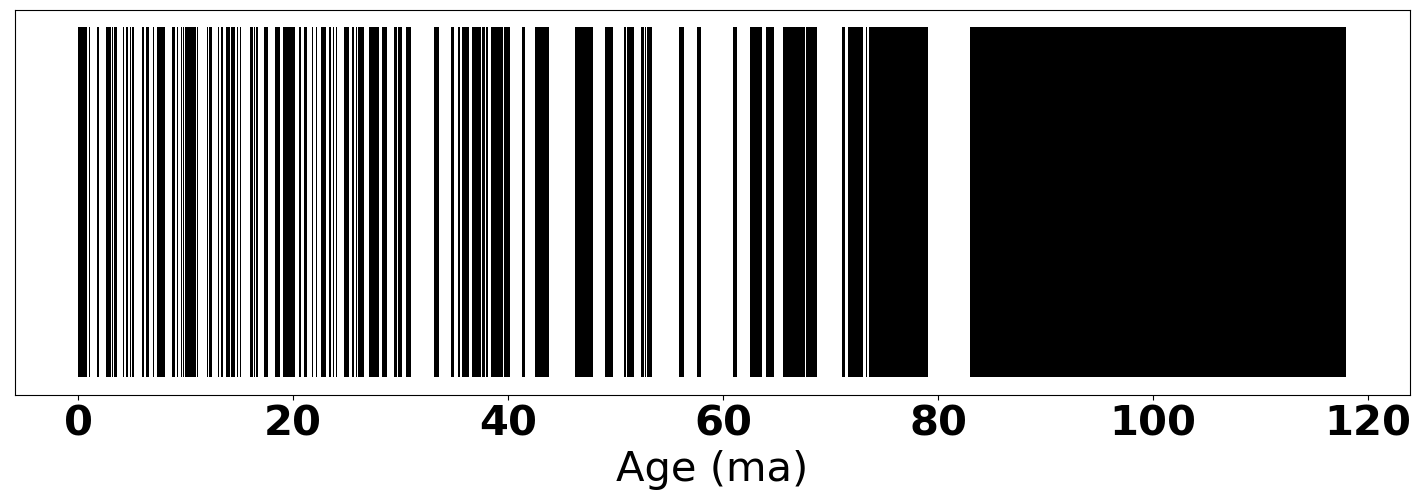

In [83]:
calc_rev_freq(0, 100)

    start of normal chron  end of normal chron
24                 11.052               11.099
25                 11.476               11.531
26                 11.935               12.078
27                 12.184               12.401
28                 12.678               12.708
29                 12.775               12.819
30                 12.991               13.139
31                 13.302               13.510
32                 13.703               14.076
33                 14.178               14.612
34                 14.800               14.888
35                 15.034               15.155
36                 16.014               16.293
37                 16.327               16.488
38                 16.556               16.726
39                 17.277               17.615
40                 18.281               18.781
    start of normal chron  end of normal chron  chron length
24                 11.052               11.099         0.047
25                 11.476       

C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(
C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo


    start of normal chron  end of normal chron
88                 71.071               71.338
89                 71.587               73.004
90                 73.291               73.374
91                 73.619               79.075
    start of normal chron  end of normal chron  chron length
88                 71.071               71.338         0.267
89                 71.587               73.004         1.417
90                 73.291               73.374         0.083
91                 73.619               79.075         5.456


C:\Users\murray98\AppData\Local\Temp/ipykernel_13096/3094737762.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GPTSselected['chron length'] = GPTSselected.apply(


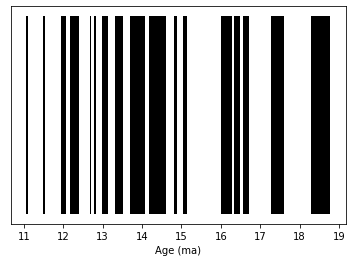

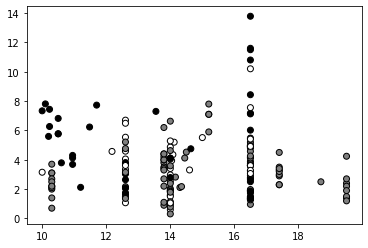

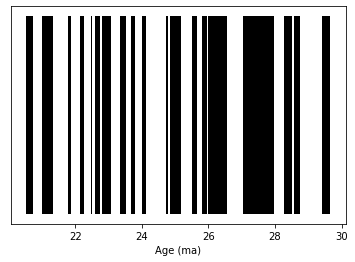

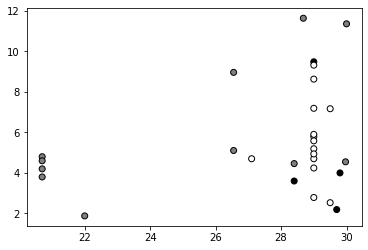

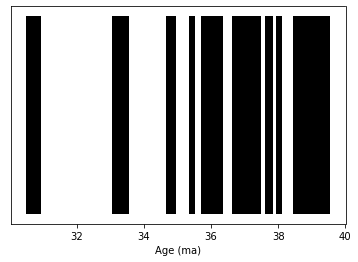

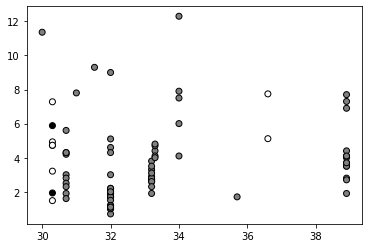

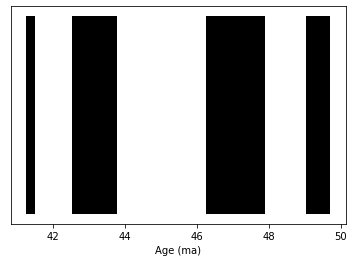

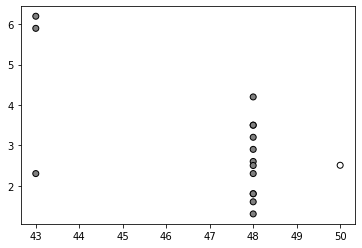

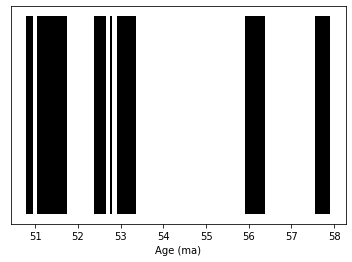

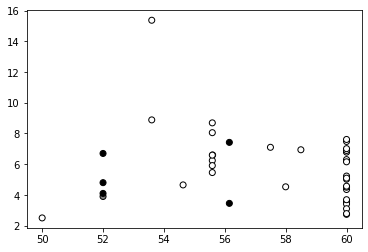

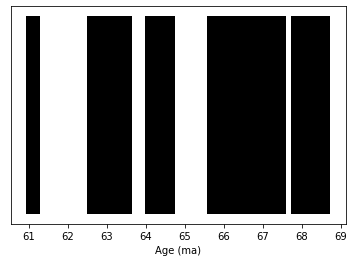

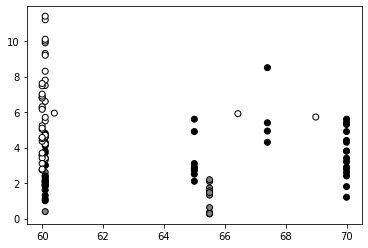

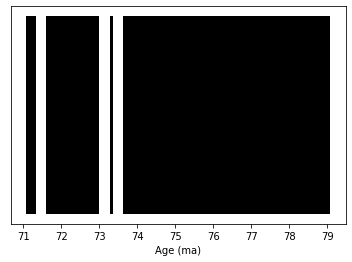

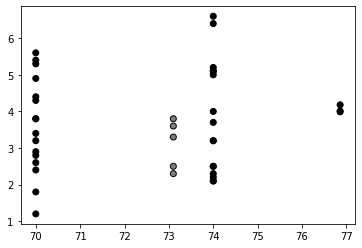

In [49]:
for runNumber in [1,2,3,4,5,6,7]:

    lowerAgeLimit = 10*runNumber #ma
    upperAgeLimit = 10*(runNumber+1) #ma
    QPIfilter = 3 #QPI score must be greater than or equal to filter


    GPTSselected = GPTS[(GPTS['start of normal chron']>=lowerAgeLimit) & (GPTS['end of normal chron']<=upperAgeLimit)]
    print(GPTSselected)
    GPTSselected['chron length'] = GPTSselected.apply(
        lambda row: row['end of normal chron'] - row['start of normal chron'], axis=1)

    print(GPTSselected)
    gptsList = GPTSselected.drop('end of normal chron', axis=1)
    gptsList = list(gptsList.itertuples(index=False, name=None))

    fig, ax = plt.subplots()
    #ax.set_axis_off()
    ax.broken_barh(gptsList, (0,1), facecolors='black')
    ax.get_yaxis().set_visible(False)
    ax.set_xlabel('Age (ma)')

    reversalFreq = (len(GPTSselected)/(upperAgeLimit- lowerAgeLimit))*2 #list is just list of normal chrons start times

    PINTselected = PINT[(PINT.QPI>=QPIfilter) & (PINT.AGE>=lowerAgeLimit) & (PINT.AGE<=upperAgeLimit)]

    ##Fix missing polarity values with filler
    values = {"P": 'O'}
    PINTselected = PINTselected.fillna(value=values)

    for i in range(len(PINTselected)):
        pol1 = PINTselected.loc[PINTselected.index[i], 'P'] 
        if pol1 not in ['N' ,'R', 'T', 'O']:
            print (PINTselected.index[i], pol1)
            if pol1 =='N ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'N'
            if pol1 =='R ':
                PINTselected.loc[PINTselected.index[i], 'P'] = 'R'
            print(PINTselected.loc[PINTselected.index[i], 'P'])

    colors = {'N':'black','R':'white', 'T':'grey', 'O':'grey'}

    fig, ax = plt.subplots()
    ax.scatter(PINTselected['AGE'], PINTselected['allVDM'], c=PINTselected['P'].map(colors), edgecolors= "black")

    PINTselected[(PINTselected.allVDM>=20)]

    #PINTselected = PINTselected.drop(labels=[4651, 4652, 4653, 4656, 4657, 4659])

    mean = PINTselected["allVDM"].mean()
    mean

    std = PINTselected["allVDM"].std()
    std

    PINTselected = PINTselected.sort_values(by=['AGE'])
    PINTselected

    ## The polarity record in PINT is not good enough to calculate reversal rate
    # reversalTimes = []
    # countReversals = 0
    # for i in range(len(PINTselected)-1):
    #     pol1 = PINTselected.loc[PINTselected.index[i], 'P']    
    #     pol2 = PINTselected.loc[PINTselected.index[i+1], 'P']

    #     while (pol1 == 'O' or pol1 == 'T'): #transistional or non-reported directions
    #         #print('No polarity reported for: ', i)
    #         i-=1 
    #         #print('huh ', i)
    #         pol1 = PINTselected.loc[PINTselected.index[i], 'P']
    #         #print(pol1, i)

    #     if (pol1=='R'and pol2=='N') or (pol1=='N'and pol2=='R'):
    #         countReversals+=1
    #         #print('Reversal at: ', i)
    #         reversalTimes.append(PINTselected.loc[PINTselected.index[i+1], 'AGE'])
    # print('Number of reversals: ', countReversals)

    # reversals = []
    # for i in range(0,(len(reversalTimes) -1),2):
    #     reversal = (reversalTimes[i], reversalTimes[i+1]-reversalTimes[i])
    #     reversals.append(reversal)
    # fig, ax = plt.subplots()
    # ax.broken_barh(reversals, (0,1), facecolors='black')
    # ax.get_yaxis().set_visible(False)

    PINTdata = {
      "lower age limit": lowerAgeLimit,
      "upper age limit": upperAgeLimit,
      "mean": mean,
        "std": std,
        "Reversal rate": reversalFreq
    }
    PINTdata

    resultsName = f"PINTdata_{runNumber}.json"
    with open(resultsName, "w") as outfile:
        json.dump(PINTdata, outfile)